In [2]:
#import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import dist
import seaborn as sns

def pixel_to_image(pixel_value):

  test_in = pd.read_csv("/content/sample_data/data/test_in.csv",index_col=None)

  im = test_in.iloc[0].values.reshape((16,16))
  plt.imshow(im)

def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None)
    return func
read_csv = no_index_read()
test_in = read_csv("test_in.csv")
test_out = read_csv("test_out.csv")
train_in = read_csv("train_in.csv")
train_out = read_csv("train_out.csv")


Preparing the Input, Output and Test examples 

In [3]:
from sklearn.preprocessing import MinMaxScaler
def make_one_hot(y, output_classes):
  one_hot = np.zeros((y.shape[0], output_classes))
  one_hot[np.arange(y.shape[0]), y] = 1

  return one_hot

def scale_values(data):
  scaler = MinMaxScaler()
  X = scaler.fit_transform(data)
  return X


Train = train_in.apply(lambda row: np.append(row.values, 1), axis=1)
Train = pd.DataFrame(Train.tolist())
#X = scale_values(Train.values)
X = Train.values
print(X.shape)
input_features_size = (Train.values[0].shape)[0]
targets = train_out.values.flatten()

digits = sorted(list(set(targets)))


no_classes = len(digits)
Y_true = make_one_hot(targets, no_classes)

Test = test_in.apply(lambda row: np.append(row.values, 1), axis=1)
Test = pd.DataFrame(Test.tolist())
#X_test = scale_values(Test.values)
X_test = Test.values
Y_test = test_out.values.flatten()
Y_test_true = make_one_hot(Y_test, no_classes)



(1706, 257)


Initializing the hyperparameters

In [4]:

W = np.random.randn(input_features_size, no_classes) 
#W = np.zeros((input_features_size, no_classes))
losses = []
test_losses = []
learning_rate = 0.01
max_epochs = 1000
total_error = 0


In [5]:
class model_values():
    def __init__(self) -> None:
        self.model_weights = None
        self.train_losses = []
        self.test_losses = []
        self.train_accuracies = []
        self.test_acuracies = []
        

Training the model

In [6]:

def calculate_error(Y_pred, Y_true):

  Error = Y_pred - Y_true

  return Error
def compute_gradient(X, Error):
  gradient_W = 2* np.dot(X.T , Error)
  
  return gradient_W

def update_weights(W, gradient_W, learning_rate):
  return W - learning_rate * gradient_W


def check_test_routine(Y_test_true, X_test, W):
  Y_pred_index = np.argmax(np.dot(X_test, W), axis=1)
  Y_pred = make_one_hot(Y_pred_index, Y_test_true.shape[1])

  loss = np.mean((Y_pred - Y_test_true) ** 2)
  accuracy = np.mean(np.argmax(Y_test_true, axis=1) == np.argmax(Y_pred, axis=1))
  return loss, accuracy


def train(X,W,Y_true, Y_test_true, X_test):
  acc_train_list = []
  acc_test_list = []
  losses = []
  test_losses = []
  model_val = model_values()
  for epoch in range(max_epochs):
    
    total_error = 0
    Y_pred_index = np.argmax(np.dot(X, W), axis=1)
    Y_pred = make_one_hot(Y_pred_index, Y_true.shape[1])
    Error = calculate_error(Y_pred, Y_true)

    gradient_W = compute_gradient(X, Error)

    W = update_weights(W, gradient_W, learning_rate)
    #Y_pred = np.dot(X, W)  # Predict outputs
    square_error = (Error) ** 2

    loss = np.mean(square_error)# Compute mean loss


    accuracy = np.mean(np.argmax(Y_true, axis=1) == np.argmax(Y_pred, axis=1))
    
    

    acc_train_list.append(accuracy)

    
    
    losses.append(loss)
    test_loss, test_accuracy = check_test_routine(Y_test_true, X_test, W)
    test_losses.append(test_loss)
    acc_test_list.append(test_accuracy)


    

          # Print progress every 10 epochs
    if loss == 0:
      break
    print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.4f}")
    
    
  model_val.train_accuracies = acc_train_list
  model_val.test_acuracies = acc_test_list
  model_val.model_weights = W
  model_val.train_losses = losses
  model_val.test_losses = test_losses

  return model_val

model_val = model_values()
model_val = train(X,W,Y_true, Y_test_true, X_test)


Epoch 1/1000, Loss: 0.1870
Epoch 2/1000, Loss: 0.1354
Epoch 3/1000, Loss: 0.1049
Epoch 4/1000, Loss: 0.1042
Epoch 5/1000, Loss: 0.0716
Epoch 6/1000, Loss: 0.0927
Epoch 7/1000, Loss: 0.0571
Epoch 8/1000, Loss: 0.0476
Epoch 9/1000, Loss: 0.0453
Epoch 10/1000, Loss: 0.0394
Epoch 11/1000, Loss: 0.0300
Epoch 12/1000, Loss: 0.0232
Epoch 13/1000, Loss: 0.0212
Epoch 14/1000, Loss: 0.0189
Epoch 15/1000, Loss: 0.0168
Epoch 16/1000, Loss: 0.0155
Epoch 17/1000, Loss: 0.0132
Epoch 18/1000, Loss: 0.0122
Epoch 19/1000, Loss: 0.0113
Epoch 20/1000, Loss: 0.0114
Epoch 21/1000, Loss: 0.0097
Epoch 22/1000, Loss: 0.0107
Epoch 23/1000, Loss: 0.0088
Epoch 24/1000, Loss: 0.0091
Epoch 25/1000, Loss: 0.0079
Epoch 26/1000, Loss: 0.0086
Epoch 27/1000, Loss: 0.0080
Epoch 28/1000, Loss: 0.0080
Epoch 29/1000, Loss: 0.0073
Epoch 30/1000, Loss: 0.0073
Epoch 31/1000, Loss: 0.0063
Epoch 32/1000, Loss: 0.0067
Epoch 33/1000, Loss: 0.0057
Epoch 34/1000, Loss: 0.0057
Epoch 35/1000, Loss: 0.0060
Epoch 36/1000, Loss: 0.0059
E

In [7]:
max_test_accuracy = max(model_val.test_acuracies)
print(max_test_accuracy)
best_epoch = model_val.test_acuracies.index(max_test_accuracy) + 1
print("the best epoch was noticed at ", best_epoch)

0.8798798798798799
the best epoch was noticed at  56


Visualisation: Loss Rate during Train/Test 

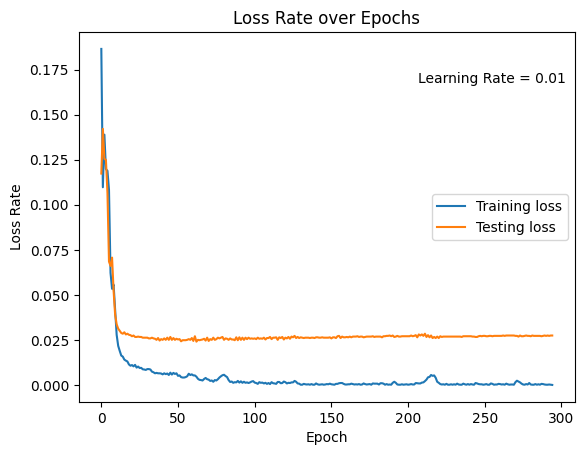

In [7]:
plt.plot(model_val.train_losses, label = "Training loss")
plt.plot(model_val.test_losses, label = "Testing loss")


plt.xlabel('Epoch')
plt.ylabel('Loss Rate')
plt.title('Loss Rate over Epochs')

plt.text(
    len(model_val.train_losses) * 0.7, 
    max(max(model_val.train_losses), max(model_val.test_losses)) * 0.9, 
    f'Learning Rate = {learning_rate}',  # Using f-string to include the variable
    fontsize=10
)
plt.legend()
plt.show()

Visualisation: Accuracy rate over Epochs

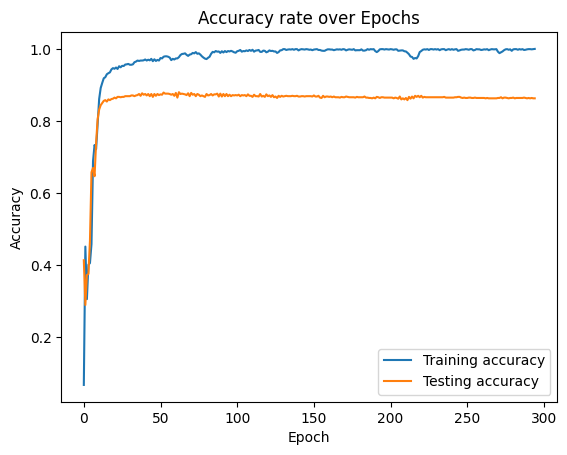

In [8]:
plt.plot(model_val.train_accuracies, label = "Training accuracy")
plt.plot(model_val.test_acuracies, label = "Testing accuracy")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy rate over Epochs')

plt.legend()
plt.show()

Testing: Predictions on Multi Class Single Layer Perceptron

In [9]:
accuracy_list = []
def predict_output(X_test, Y_test, model_weights):
    correct_predictions = 0
    predictions = []

    for i in range(X_test.shape[0]):
      dot_product = np.dot(X_test[i], model_weights)
      y_pred = np.argmax(dot_product)
      predictions.append(y_pred)
      #print(f"Target value is {test_targets[i]} and Predicted value is {y_pred}")

      if y_pred == Y_test[i]:
        correct_predictions+=1

    accuracy = (correct_predictions / X_test.shape[0])*100
    accuracy_list.append(accuracy)

    return accuracy, predictions

accuracy_perceptron, predictions = predict_output(X_test, Y_test,model_val.model_weights)

print(accuracy_perceptron)

86.28628628628628


Evaluate KNN performance

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the value of k
knn.fit(train_in, train_out)
train_predictions_knn = knn.predict(train_in.values)


# Step 3: Calculate accuracies for both classifiers

train_accuracy_knn = accuracy_score(train_out.values.ravel(), train_predictions_knn)
test_predictions_knn = knn.predict(test_in.values)
test_accuracy_knn = accuracy_score(test_out.values.ravel(), test_predictions_knn)
print(train_accuracy_knn, test_accuracy_knn)

/opt/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9788980070339977 0.913913913913914


Conclusion: KNN and Single layer Perceptron Performance

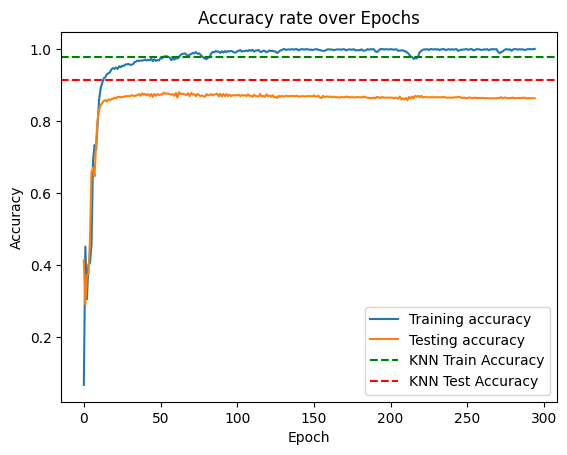

In [12]:
plt.plot(model_val.train_accuracies, label = "Training accuracy")
plt.plot(model_val.test_acuracies, label = "Testing accuracy")
plt.axhline(y=train_accuracy_knn, color='g', linestyle='--', label='KNN Train Accuracy')
plt.axhline(y=test_accuracy_knn, color='r', linestyle='--', label='KNN Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy rate over Epochs')

plt.legend()
plt.show()